# Graph Theory applied to soccer

In [ ]:
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
from mplsoccer import Pitch, VerticalPitch

In [ ]:
# Library that works with netwroks and calculates networks' properties
import networkx as nx
from collections import Counter

In [ ]:
# Matches from La Liga 2020/2021
compid = 11
seasonid= 90
tournament = sb.matches(competition_id=compid,season_id=seasonid)
tournament

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3773386,2020-10-31,21:00:00.000,Spain - La Liga,2020/2021,Deportivo Alavés,Barcelona,1,1,available,...,2023-07-25T04:25:41.348202,8,Regular Season,Estadio de Mendizorroza,NaN,Pablo Javier Machín Díez,Ronald Koeman,1.1.0,2,2
1,3773565,2021-01-09,18:30:00.000,Spain - La Liga,2020/2021,Granada,Barcelona,0,4,available,...,2023-07-25T04:30:16.058384,18,Regular Season,Estadio Nuevo Los Cármenes,Ricardo De Burgos Bengoetxea,Diego Martínez Penas,Ronald Koeman,1.1.0,2,2
2,3773457,2021-05-16,18:30:00.000,Spain - La Liga,2020/2021,Barcelona,Celta Vigo,1,2,available,...,2023-04-27T23:03:53.506485,37,Regular Season,Spotify Camp Nou,NaN,Ronald Koeman,Eduardo Germán Coudet,1.1.0,2,2
3,3773631,2021-02-07,21:00:00.000,Spain - La Liga,2020/2021,Real Betis,Barcelona,2,3,available,...,2023-07-25T03:56:34.733180,22,Regular Season,Estadio Benito Villamarín,NaN,Manuel Luis Pellegrini Ripamonti,Ronald Koeman,1.1.0,2,2
4,3773665,2021-03-06,21:00:00.000,Spain - La Liga,2020/2021,Osasuna,Barcelona,0,2,available,...,2023-04-28T02:57:03.412841,26,Regular Season,Estadio El Sadar,Guillermo Cuadra Fernández,Jagoba Arrasate Elustondo,Ronald Koeman,1.1.0,2,2
5,3773497,2021-04-10,21:00:00.000,Spain - La Liga,2020/2021,Real Madrid,Barcelona,2,1,available,...,2023-04-28T01:35:16.051381,30,Regular Season,Estadio Alfredo Di Stéfano,Jesús Gil Manzano,Zinédine Zidane,Ronald Koeman,1.1.0,2,2
6,3773660,2020-12-13,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Levante UD,1,0,available,...,2023-04-28T06:01:10.173360,13,Regular Season,Spotify Camp Nou,Ricardo De Burgos Bengoetxea,Ronald Koeman,Francisco José López Fernández,1.1.0,2,2
7,3773593,2020-09-27,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Villarreal,4,0,available,...,2023-07-25T04:44:03.367478,3,Regular Season,Spotify Camp Nou,Guillermo Cuadra Fernández,Ronald Koeman,Unai Emery Etxegoien,1.1.0,2,2
8,3773466,2020-10-01,21:30:00.000,Spain - La Liga,2020/2021,Celta Vigo,Barcelona,0,3,available,...,2023-07-25T04:40:53.635540,4,Regular Season,Abanca-Balaídos,Carlos del Cerro Grande,Óscar García Junyent,Ronald Koeman,1.1.0,2,2
9,3773585,2020-10-24,16:00:00.000,Spain - La Liga,2020/2021,Barcelona,Real Madrid,1,3,available,...,2023-07-25T04:29:21.140321,7,Regular Season,Spotify Camp Nou,Juan Martínez Munuera,Ronald Koeman,Zinédine Zidane,1.1.0,2,2


In [ ]:
# Generalized function for Graph Theory
def graph_theory_match(idmatch):
    teams = tournament[tournament.match_id == idmatch]
    home_team = teams.iloc[0]['home_team']
    away_team = teams.iloc[0]['away_team']
    winner = home_team if teams.home_score.iloc[0] > teams.away_score.iloc[0] else away_team
    loser = away_team if teams.home_score.iloc[0] > teams.away_score.iloc[0] else home_team

    soccer_match = sb.events(match_id=idmatch)
    match_filtered = soccer_match[pd.notna(soccer_match['pass_end_location'])]
    match_filtered['x'] = match_filtered.location.apply(lambda cell: cell[0])
    match_filtered['y'] = match_filtered.location.apply(lambda cell: cell[1])

    # Calculate mean positions and total passes for each player
    positions_and_passes = match_filtered[['player', 'team', 'x', 'y', 'pass_recipient']]
    players_mean_position = {}
    players_passes_count = {}
    for player in positions_and_passes.player.unique():
        df = positions_and_passes[positions_and_passes.player == player]
        x_mean = df.x.mean()
        y_mean = df.y.mean()
        passes_count = len(df)
        mean_position = (x_mean, y_mean)
        players_mean_position[player] = mean_position
        players_passes_count[player] = passes_count

    # Start the plot
    fig, axs = plt.subplots(1, 1, figsize=(16, 6))
    pitch.draw(axs)
    axs.set_title('Players mean positions and passes\n' + home_team + ' vs. ' + away_team)



    # Plotting passes
    for player in positions_and_passes.player.unique():
        df = positions_and_passes[positions_and_passes.player == player]
        passes_to_player = {}
        color = 'lightseagreen' if df.team.iloc[0] == winner else 'tomato'

        for player2 in df.pass_recipient.unique():
            df2 = df[df.pass_recipient == player2]
            passes_to_player[player2] = len(df2)

        for player2, num_passes in passes_to_player.items():
            linewidth = num_passes / max(passes_to_player.values()) * 5
            position1 = players_mean_position[player]
            position2 = players_mean_position.get(player2)

            # Mirror the x-coordinate for the away team
            if df.team.iloc[0] == away_team:
                position1 = (120 - position1[0], position1[1])
                if position2:
                    position2 = (120 - position2[0], position2[1])

            if position2:  # Check if player2 position exists
                axs.plot([position1[0], position2[0]], [position1[1], position2[1]], color=color, alpha=0.2, linewidth=linewidth)

    # Plotting player positions
    for player, position in players_mean_position.items():
        df = positions_and_passes[positions_and_passes.player == player]
        marker_size = players_passes_count[player] / max(players_passes_count.values()) * 20
        color = 'lightseagreen' if df.team.iloc[0] == winner else 'tomato'

        # Mirror the x-coordinate for the away team
        if df.team.iloc[0] == away_team:
            position = (120 - position[0], position[1])

        axs.plot(position[0], position[1], color=color, marker='o', markersize=marker_size, alpha=1)
    axs.text(0.7, 0.1, f'Winner: {winner}', fontsize=9,color='teal',
         transform=axs.transAxes)
    axs.text(0.7, 0.07, f'Loser: {loser}', fontsize=9, color='firebrick',
         transform=axs.transAxes)
    plt.show()

# Calculate graph's properties for both teams
    number_nodes_winner, number_edges_winner, density_winner, diameter_winner, transitivity_winner = None, None, None, None, None
    number_nodes_loser, number_edges_loser, density_loser, diameter_loser, transitivity_loser = None, None, None, None, None

# Calculate graph's properties for both team
    for team in (winner,loser):
      G = nx.Graph()
      match_team = match_filtered[match_filtered.team == team][['player','team','x','y','pass_recipient']]
      players_mean_position = {}
      players_passes_count = {}
      for player in match_team.player.unique():
        df = positions_and_passes[positions_and_passes.player == player]
        x_mean = df.x.mean()
        y_mean = df.y.mean()
        passes_count = len(df)
        mean_position = (x_mean, y_mean)
        players_mean_position[player] = mean_position
        players_passes_count[player] = passes_count


      players = list(players_mean_position.keys())
      positions = list(players_mean_position.values())

      #Creating nodes
      for i in range(len(players)):
        G.add_node(players[i], pos=positions[i])

        pos = nx.get_node_attributes(G, 'pos')

        #Creating edges
      edges = []
      for index, row in match_team.iterrows():
        player = row['player']
        pass_recipient = row['pass_recipient']
        edges.append((player, pass_recipient))

      # Weighted edges
      for (x, y), weight in Counter(edges).items():
        G.add_edge(x, y, weight=weight)

      # Getting calculations
      if team == winner:
        number_nodes_winner = int(G.number_of_nodes())
        number_edges_winner  = int(G.number_of_edges())
        density_winner  = nx.density(G)
        diameter_winner  = nx.diameter(G)
        transitivity_winner  = nx.transitivity(G)
    else:
        number_nodes_loser = int(G.number_of_nodes())
        number_edges_loser  = int(G.number_of_edges())
        density_loser  = nx.density(G)
        diameter_loser  = nx.diameter(G)
        transitivity_loser  = nx.transitivity(G)
    return (
          winner,
          loser,
          number_nodes_winner,
          number_edges_winner,
          density_winner,
          diameter_winner,
          transitivity_winner,
          number_nodes_loser,
          number_edges_loser,
          density_loser,
          diameter_loser,
          transitivity_loser,
      )

<ipython-input-39-954a1bcc1cb9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_filtered['x'] = match_filtered.location.apply(lambda cell: cell[0])
<ipython-input-39-954a1bcc1cb9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_filtered['y'] = match_filtered.location.apply(lambda cell: cell[1])


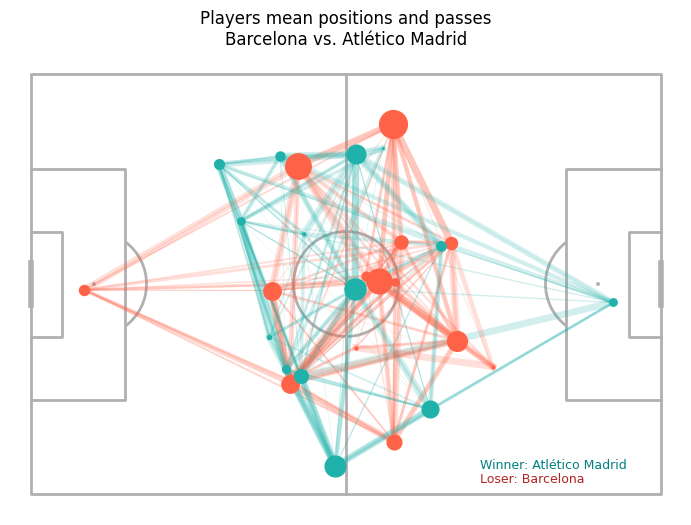

('Atlético Madrid',
 'Barcelona',
 15,
 74,
 0.7047619047619048,
 2,
 0.7942386831275721,
 16,
 91,
 0.7583333333333333,
 2,
 0.816)

In [ ]:
graph_theory_match(3773372)